## Load the Dataset

In [8]:
! git pull

Already up to date.


In [1]:
import pandas as pd

# Path to your uploaded dataset (adjust if needed)
data_path = "train.csv"

# Load the dataset
train_df = pd.read_csv(data_path)

# Display basic info
print("Shape of dataset:", train_df.shape)
display(train_df.head())

# Quick overview
train_df.info()
train_df.describe().T

Shape of dataset: (593994, 13)


,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


,count,mean,std,min,25%,50%,75%,max
id,593994.0,296996.500000,171471.442235,0.000,148498.250,296996.500,445494.750,593993.000
annual_income,593994.0,48212.202976,26711.942078,6002.430,27934.400,46557.680,60981.320,393381.740
debt_to_income_ratio,593994.0,0.120696,0.068573,0.011,0.072,0.096,0.156,0.627
credit_score,593994.0,680.916009,55.424956,395.000,646.000,682.000,719.000,849.000
loan_amount,593994.0,15020.297629,6926.530568,500.090,10279.620,15000.220,18858.580,48959.950
interest_rate,593994.0,12.356345,2.008959,3.200,10.990,12.370,13.680,20.990
loan_paid_back,593994.0,0.798820,0.400883,0.000,1.000,1.000,1.000,1.000


## Target variable distribution, imbalance, Outlier detection in num predictors 

Target variable counts:
loan_paid_back
1.0    474494
0.0    119500
Name: count, dtype: int64

Proportion of each class:
loan_paid_back
1.0    0.79882
0.0    0.20118
Name: proportion, dtype: float64


/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/3289405374.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_paid_back', data=train_df, palette='pastel')


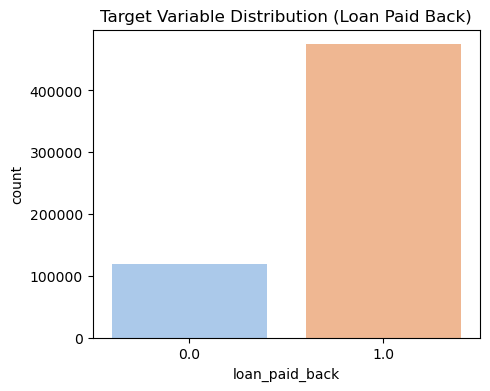


=== IQR-based Outlier Detection ===


,% Outliers
annual_income,2.68
debt_to_income_ratio,2.96
credit_score,0.99
loan_amount,0.49
interest_rate,0.86



=== 3-Sigma Rule Outlier Detection ===


,% Outliers (3σ)
annual_income,1.52
debt_to_income_ratio,1.23
credit_score,0.15
loan_amount,0.19
interest_rate,0.28


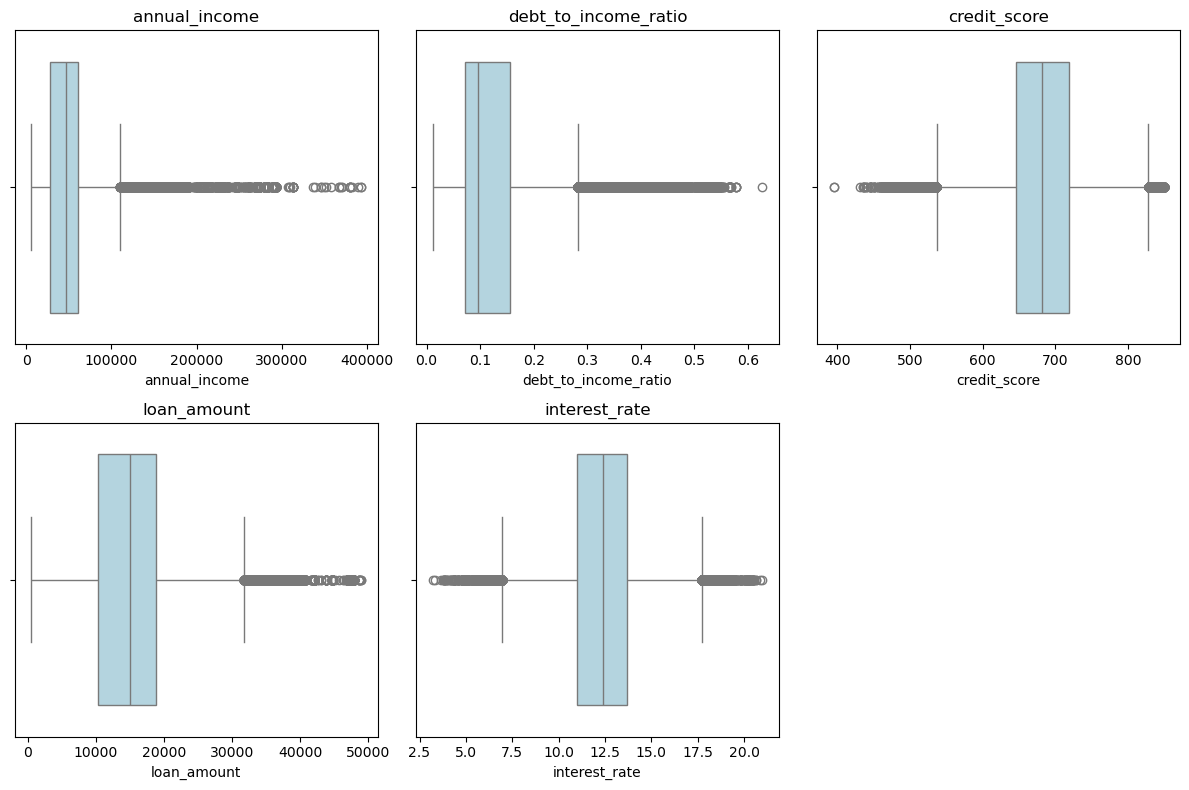

In [2]:
# ===============================
# Outlier and Target Analysis
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ TARGET DISTRIBUTION
print("Target variable counts:")
print(train_df['loan_paid_back'].value_counts())
print("\nProportion of each class:")
print(train_df['loan_paid_back'].value_counts(normalize=True))

plt.figure(figsize=(5,4))
sns.countplot(x='loan_paid_back', data=train_df, palette='pastel')
plt.title("Target Variable Distribution (Loan Paid Back)")
plt.show()


# 2️⃣ DEFINE NUMERIC COLUMNS
numeric_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score',
                'loan_amount', 'interest_rate']


# 3️⃣ OUTLIER DETECTION USING IQR METHOD
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    pct = len(outliers) / len(df) * 100
    return outliers, pct

print("\n=== IQR-based Outlier Detection ===")
iqr_summary = {}
for col in numeric_cols:
    _, pct = detect_outliers_iqr(train_df, col)
    iqr_summary[col] = round(pct, 2)

iqr_summary = pd.DataFrame.from_dict(iqr_summary, orient='index', columns=['% Outliers'])
display(iqr_summary)


# 4️⃣ OUTLIER DETECTION USING 3-SIGMA RULE
print("\n=== 3-Sigma Rule Outlier Detection ===")
sigma_summary = {}
for col in numeric_cols:
    mean = train_df[col].mean()
    std = train_df[col].std()
    lower, upper = mean - 3*std, mean + 3*std
    outliers = train_df[(train_df[col] < lower) | (train_df[col] > upper)]
    pct = len(outliers) / len(train_df) * 100
    sigma_summary[col] = round(pct, 2)

sigma_summary = pd.DataFrame.from_dict(sigma_summary, orient='index', columns=['% Outliers (3σ)'])
display(sigma_summary)


# 5️⃣ OPTIONAL: BOXPLOTS FOR VISUAL INSPECTION
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=train_df[col], color='lightblue')
    plt.title(col)
plt.tight_layout()
plt.show()

## Categorical Variable Imbalance Check


=== GENDER ===


,Count,Percent
gender,,
Female,306175,51.55
Male,284091,47.83
Other,3728,0.63


/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/1796445524.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=counts.index, palette='pastel')


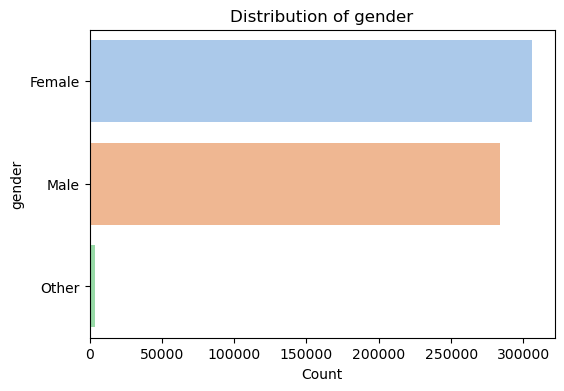


=== MARITAL_STATUS ===


,Count,Percent
marital_status,,
Single,288843,48.63
Married,277239,46.67
Divorced,21312,3.59
Widowed,6600,1.11


/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/1796445524.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=counts.index, palette='pastel')


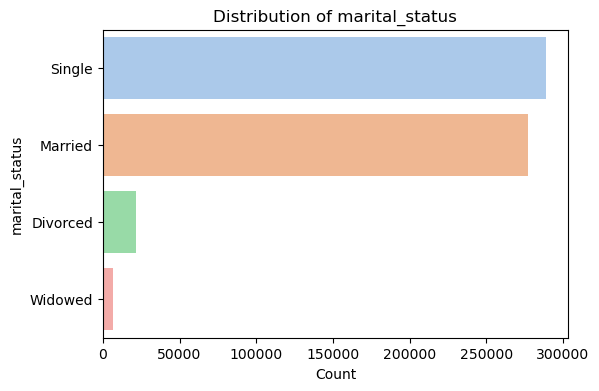


=== EDUCATION_LEVEL ===


,Count,Percent
education_level,,
Bachelor's,279606,47.07
High School,183592,30.91
Master's,93097,15.67
Other,26677,4.49
PhD,11022,1.86


/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/1796445524.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=counts.index, palette='pastel')


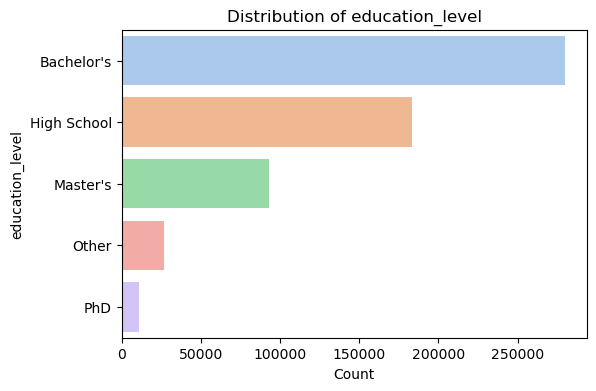


=== EMPLOYMENT_STATUS ===


,Count,Percent
employment_status,,
Employed,450645,75.87
Unemployed,62485,10.52
Self-employed,52480,8.84
Retired,16453,2.77
Student,11931,2.01


/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/1796445524.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=counts.index, palette='pastel')


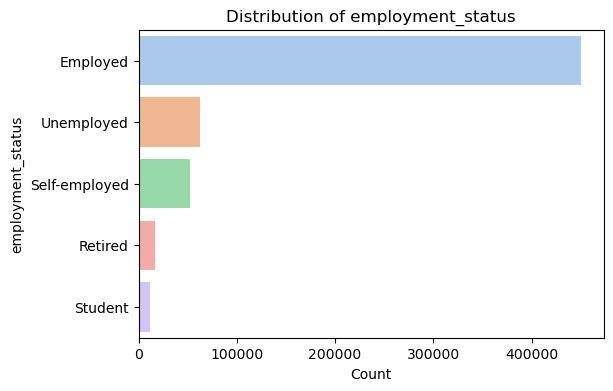


=== LOAN_PURPOSE ===


,Count,Percent
loan_purpose,,
Debt consolidation,324695,54.66
Other,63874,10.75
Car,58108,9.78
Home,44118,7.43
Education,36641,6.17
Business,35303,5.94
Medical,22806,3.84
Vacation,8449,1.42


/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/1796445524.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=counts.index, palette='pastel')


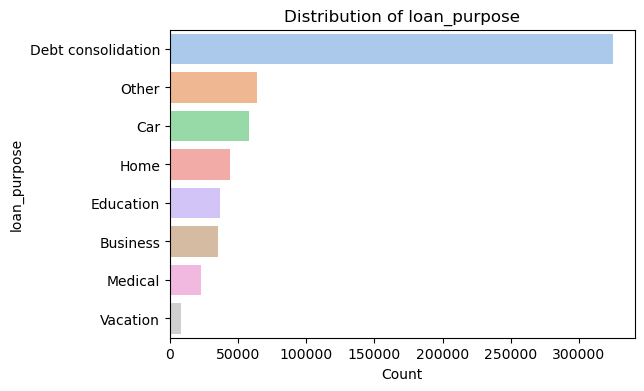


=== GRADE_SUBGRADE ===


,Count,Percent
grade_subgrade,,
C3,58695,9.88
C4,55957,9.42
C2,54443,9.17
C1,53363,8.98
C5,53317,8.98
D1,37029,6.23
D3,36694,6.18
D4,35097,5.91
D2,34432,5.80


/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/1796445524.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=counts.index, palette='pastel')


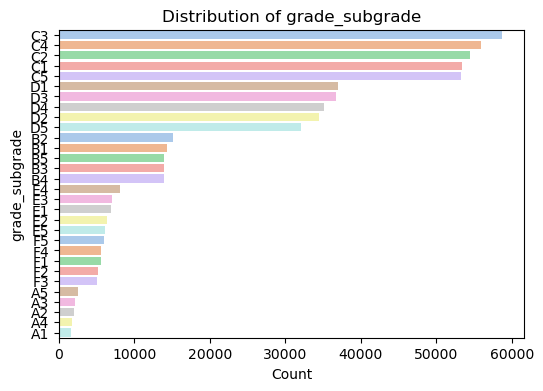

In [3]:
# ===============================
# Categorical Variable Imbalance Check
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns
cat_cols = ['gender', 'marital_status', 'education_level',
            'employment_status', 'loan_purpose', 'grade_subgrade']

# Function to display counts and proportions
def categorical_summary(df, col):
    counts = df[col].value_counts()
    proportions = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': counts, 'Percent': proportions.round(2)})
    print(f"\n=== {col.upper()} ===")
    display(summary)
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df, order=counts.index, palette='pastel')
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

# Apply to all categorical columns
for col in cat_cols:
    categorical_summary(train_df, col)

## Relationshib between y and predictors 

### categorical vs Y


================ GENDER ================


gender
Female    0.801708
Male      0.795752
Other     0.795333
Name: loan_paid_back, dtype: float64

/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/1946336974.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rate.index, y=rate.values, palette='pastel')


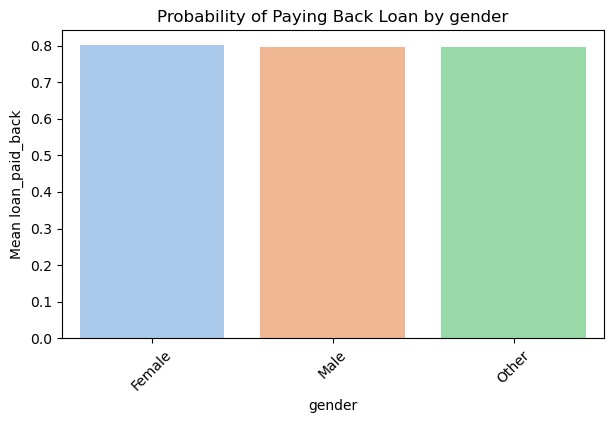

Chi-square p-value: 0.00000

================ MARITAL_STATUS ================


marital_status
Married     0.799144
Single      0.798873
Divorced    0.796640
Widowed     0.789848
Name: loan_paid_back, dtype: float64

/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/1946336974.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rate.index, y=rate.values, palette='pastel')


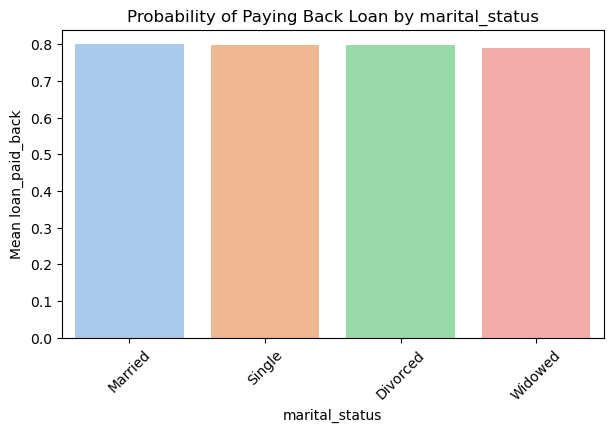

Chi-square p-value: 0.24856

================ EDUCATION_LEVEL ================


education_level
PhD            0.830067
High School    0.809698
Other          0.802789
Master's       0.802346
Bachelor's     0.788892
Name: loan_paid_back, dtype: float64

/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/1946336974.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rate.index, y=rate.values, palette='pastel')


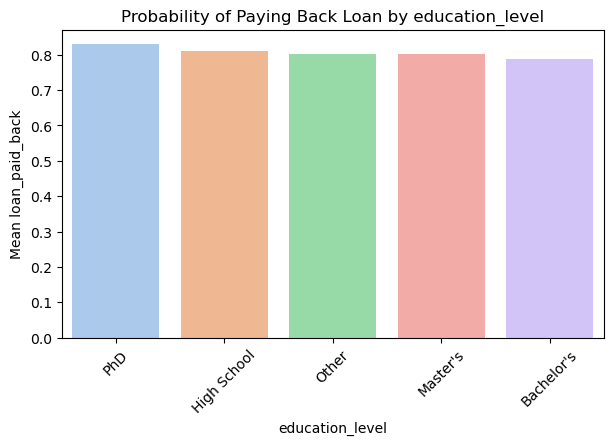

Chi-square p-value: 0.00000

================ EMPLOYMENT_STATUS ================


employment_status
Retired          0.997204
Self-employed    0.898457
Employed         0.894145
Student          0.263515
Unemployed       0.077619
Name: loan_paid_back, dtype: float64

/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/1946336974.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rate.index, y=rate.values, palette='pastel')


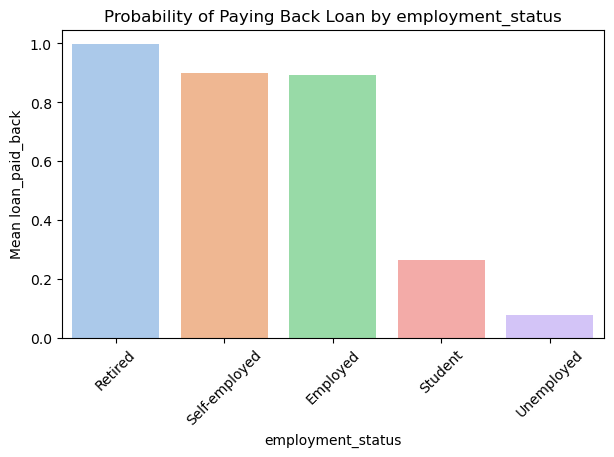

Chi-square p-value: 0.00000

================ LOAN_PURPOSE ================


loan_purpose
Home                  0.823224
Business              0.813104
Other                 0.802377
Car                   0.800630
Debt consolidation    0.796911
Vacation              0.796071
Medical               0.778085
Education             0.777053
Name: loan_paid_back, dtype: float64

/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/1946336974.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rate.index, y=rate.values, palette='pastel')


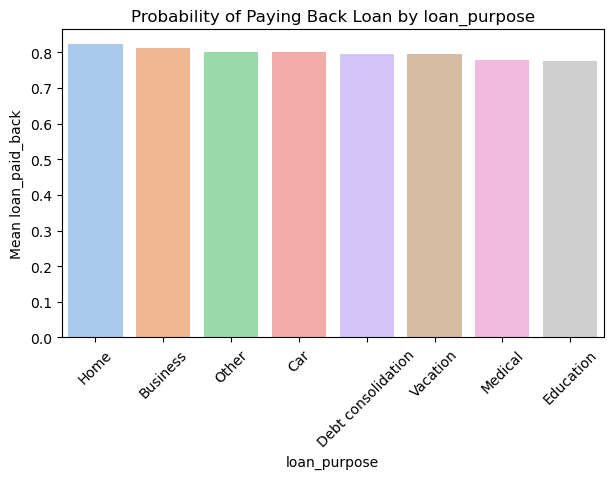

Chi-square p-value: 0.00000

================ GRADE_SUBGRADE ================


grade_subgrade
A4    0.957084
A3    0.955470
A2    0.952924
A1    0.952500
A5    0.944962
B3    0.940040
B2    0.937430
B5    0.934204
B4    0.931758
B1    0.916341
C1    0.860090
C2    0.851165
C5    0.846259
C4    0.843987
C3    0.836000
D1    0.731886
D2    0.720957
D4    0.714733
D5    0.713000
D3    0.695972
E5    0.669461
E2    0.662743
E1    0.652010
E4    0.649577
E3    0.641837
F5    0.639314
F4    0.637037
F1    0.624503
F2    0.617721
F3    0.604093
Name: loan_paid_back, dtype: float64

/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/1946336974.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rate.index, y=rate.values, palette='pastel')


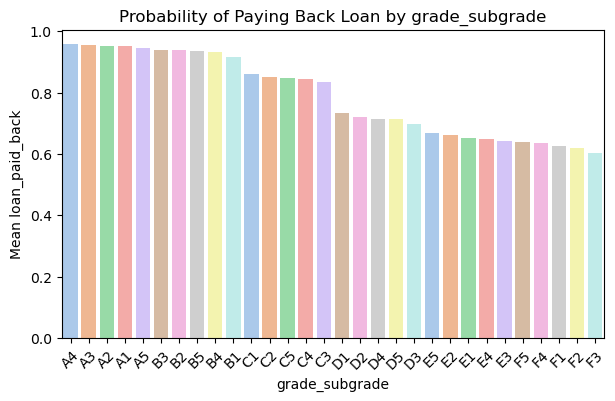

Chi-square p-value: 0.00000


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency

cat_cols = ['gender', 'marital_status', 'education_level',
            'employment_status', 'loan_purpose', 'grade_subgrade']

for col in cat_cols:
    print(f"\n================ {col.upper()} ================")

    # 1) Target rate per category
    rate = train_df.groupby(col)['loan_paid_back'].mean().sort_values(ascending=False)
    display(rate)

    # 2) Plot target rate
    plt.figure(figsize=(7,4))
    sns.barplot(x=rate.index, y=rate.values, palette='pastel')
    plt.title(f"Probability of Paying Back Loan by {col}")
    plt.ylabel("Mean loan_paid_back")
    plt.xticks(rotation=45)
    plt.show()

    # 3) Chi-square test
    contingency = pd.crosstab(train_df[col], train_df['loan_paid_back'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square p-value: {p:.5f}")

### numeric vs Y


================ ANNUAL_INCOME ================


/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/2206185544.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_paid_back', y=col, data=train_df, palette='pastel')


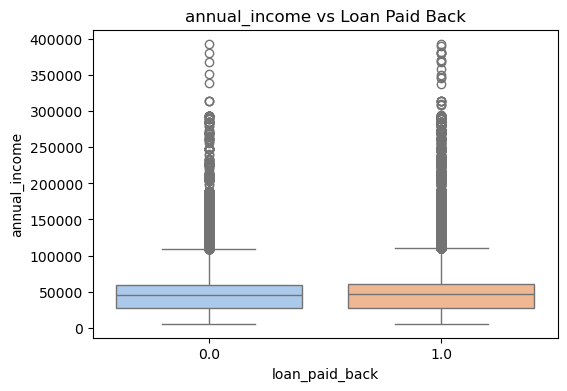


================ DEBT_TO_INCOME_RATIO ================


/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/2206185544.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_paid_back', y=col, data=train_df, palette='pastel')


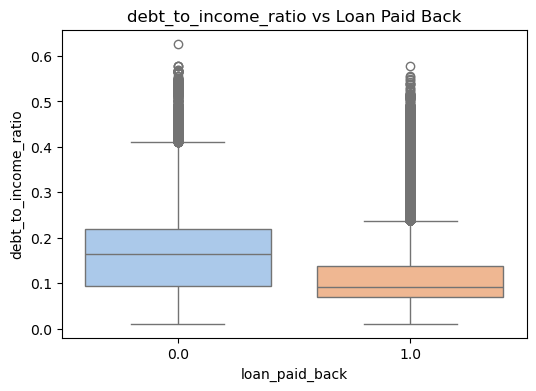


================ CREDIT_SCORE ================


/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/2206185544.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_paid_back', y=col, data=train_df, palette='pastel')


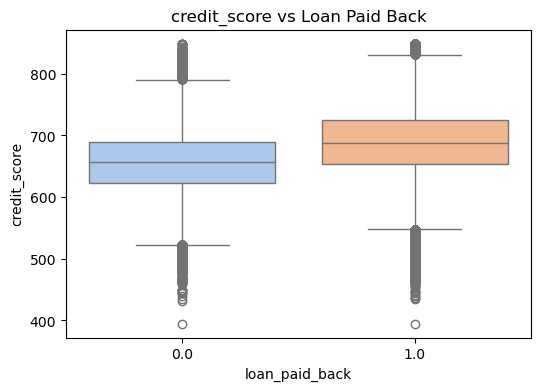


================ LOAN_AMOUNT ================


/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/2206185544.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_paid_back', y=col, data=train_df, palette='pastel')


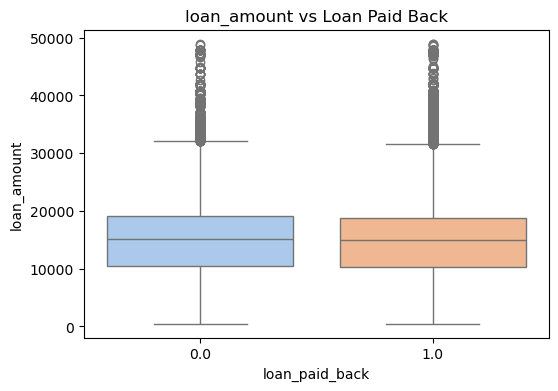


================ INTEREST_RATE ================


/var/folders/yv/rwvtmm3n7l55qvgs5p5dy3tm0000gn/T/ipykernel_10062/2206185544.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_paid_back', y=col, data=train_df, palette='pastel')


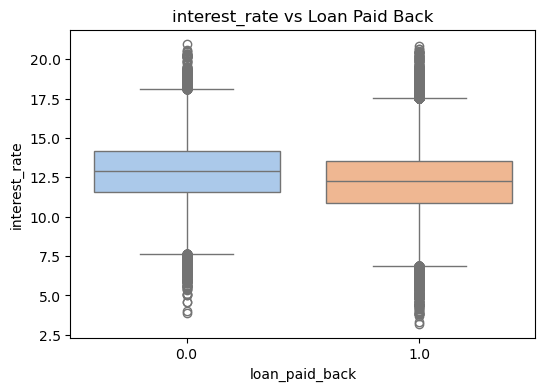

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

num_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score',
            'loan_amount', 'interest_rate']

for col in num_cols:
    print(f"\n================ {col.upper()} ================")

    # 1) Boxplot by target
    plt.figure(figsize=(6,4))
    sns.boxplot(x='loan_paid_back', y=col, data=train_df, palette='pastel')
    plt.title(f"{col} vs Loan Paid Back")
    plt.show()

   

## Multicolinearity

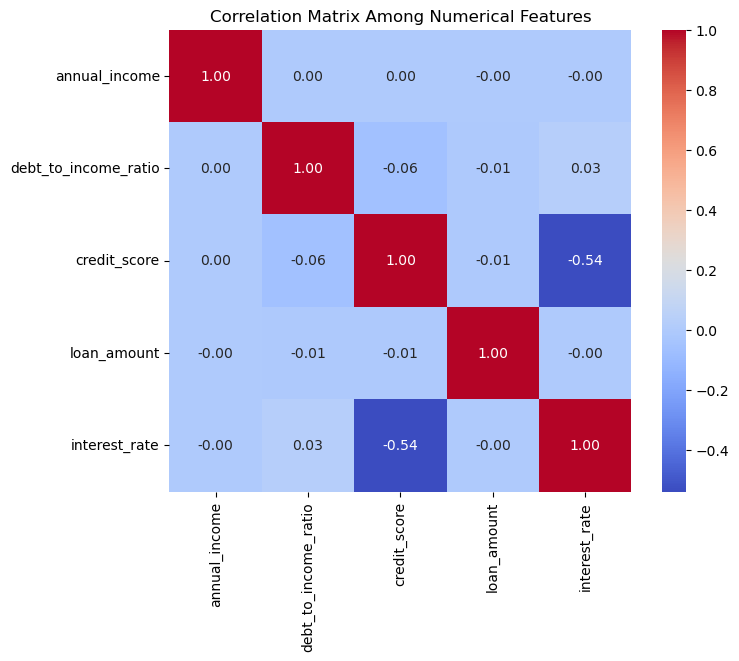

,Feature,VIF
3,credit_score,1.412238
5,interest_rate,1.408122
2,debt_to_income_ratio,1.003898
4,loan_amount,1.000145
1,annual_income,1.000018


In [6]:
# ===============================
# Multicollinearity Analysis
# ===============================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns for multicollinearity analysis
numeric_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score',
                'loan_amount', 'interest_rate']

num_df = train_df[numeric_cols]

# 1️⃣ CORRELATION MATRIX
plt.figure(figsize=(8,6))
corr = num_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Among Numerical Features")
plt.show()

# 2️⃣ VARIANCE INFLATION FACTOR (VIF)
# Add a constant for statsmodels
from statsmodels.tools.tools import add_constant
X_vif = add_constant(num_df)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

# Drop the constant term from the output
vif_data = vif_data[vif_data["Feature"] != "const"]
display(vif_data.sort_values(by="VIF", ascending=False))

# 📊 Exploratory Data Analysis Summary

---

## 1. Target Variable Imbalance

The target variable `loan_paid_back` is **strongly imbalanced**:

| Value | Count | Percentage |
|-------|--------|------------|
| **1.0 (Paid Back)** | 474,494 | **79.9%** |
| **0.0 (Not Paid Back)** | 119,500 | **20.1%** |

### **Interpretation**
- A **4:1 imbalance** exists.
- Models may become biased toward predicting **1 (paid back)**.

### **Recommended Actions**
- Use `class_weight="balanced"` in models.
- Consider oversampling (SMOTE) or undersampling.
- Always use **stratified** train–test split.

---

## 2. Outlier Analysis

Both IQR and 3-sigma methods show very low outlier percentages.

### **IQR Outliers (< 3%)**
- `annual_income`: ~2.7%  
- `debt_to_income_ratio`: ~3%  
- Others: <1%

### **3-Sigma Outliers (< 1.5%)**
- All numeric features fall below ~1.5%.

### **Interpretation**
- The dataset is clean.
- No aggressive outlier removal is needed.
- Tree-based models naturally handle outliers.

---

## 3. Categorical Variable Imbalance

### **Balanced or Acceptable**
- `gender`: Female 51%, Male 48%
- `marital_status`: fairly balanced
- `education_level`: moderately balanced

### **Moderate Imbalance**
- `employment_status`  
  - Employed = 76%  
  - Other categories are much smaller

### **High Imbalance**
- `loan_purpose`  
  - Debt Consolidation = 55%
- `grade_subgrade`  
  - Many rare levels (<1%)

### **Recommended Encoding**
- Use **Target Encoding** or **Frequency Encoding** for:
  - `grade_subgrade`
  - `loan_purpose`
  - `employment_status`

---

## 4. Relationship Between Predictors and Target (Binary Y)

### **Categorical Predictors**

Strongest relationships:

#### **Employment Status**
- Retired: ~99.7% repaid  
- Employed / Self-employed: ~89%  
- Student: ~26%  
- Unemployed: ~7%  
→ **Highly predictive**

#### **Grade/Subgrade**
- A-grade loans: **95%+**  
- B-grades: ~92–94%  
- C-grades: ~84%  
- D-grades: ~70%  
- E/F grades: ~60–65%  
→ **Strongest predictor overall**

#### **Loan Purpose**
- Home > Business > Other > Car > Debt Consolidation > Education  
→ Moderate influence

#### **Education Level**
- Small differences (PhD > High School > Others)

---

## 5. Numeric Predictors vs Target

### **General Patterns**
- Higher `credit_score` → higher repayment probability  
- Higher `debt_to_income_ratio` → lower repayment probability  
- Higher `interest_rate` → lower repayment  
- `annual_income` and `loan_amount` show mild effects

### **Interpretation**
- Numeric features have **moderate** predictive power.
- Categorical features contribute **much stronger signal**.

---

## 6. Multicollinearity

### **VIF Values**
All numeric features have VIF values near **1.0–1.4**, indicating:

- No multicollinearity
- No redundant features
- Correlation matrix confirms low inter-feature correlation

### **Interpretation**
- Multicollinearity is **not a concern**.
- No need to drop or combine numeric features.

---

## ✔️ Final Conclusions

- The dataset is **clean**, with **minimal outliers** and **no multicollinearity**.
- The major issue is **target imbalance (80/20)**.
- Categorical variables—especially `grade_subgrade` and `employment_status`—carry **very strong predictive power**.
- Numeric variables have **weaker relationships** but still add value.
- Smart encoding strategies (target/frequency encoding) and class imbalance handling will significantly improve model performance.

## Best methods to use are
- For tree models (XGBoost, LightGBM, CatBoost) > Use scale_pos_weight:
- For Logistic Regression or SVM > class_weight="balanced"
- For deep learning > Use Focal Loss or weighted BCE.
- Do NOT one-hot encode grade_subgrade — it has 30+ categories
- Train-Test Split (Stratified)

## Feature Engineering



Based on the exploratory data analysis, the dataset showed:

- ✔ Clean numeric features (few outliers)  
- ✔ No missing values  
- ✔ No multicollinearity  
- ❗ Strong target imbalance  
- ❗ High-cardinality categorical variables  
- ❗ Some important interactions not explicitly present in the data  

To enhance predictive power for tree-based models, the following **five engineered features** were added:

---

### 1. `loan_burden`
**Definition:**  
The ratio of `loan_amount` to `annual_income`.

**Formula:**  loan_burden = loan_amount / annual_income

**Purpose:**  
This measures how large a borrower’s loan is relative to income. A higher burden typically indicates higher risk of default.

---

###  2. `interest_x_amount`
**Definition:**  
An interaction term combining `interest_rate` and `loan_amount`.

**Formula:**  interest_x_amount = interest_rate * loan_amount

**Purpose:**  
Large loans with high interest rates are riskier. This interaction captures the joint effect better than either feature alone.

---

###  3. `loan_to_income`
**Definition:**  
Another income-normalized loan measure, similar to loan burden but kept as a separate ratio.

**Formula:**  loan_to_income = loan_amount / (annual_income + 1)

**Purpose:**  
Stabilizes the relationship between loan and income, and tree models often benefit from having multiple ratio-style features.

---

###  4. `grade`
**Definition:**  
The letter grade extracted from `grade_subgrade`.  
For example:  
- A1 → A  
- C3 → C  
- F5 → F  

**Formula:**  grade = grade_subgrade.str[0]

**Purpose:**  
The extracted grade (A–F) carries most of the predictive signal.  
This reduces noise from 30+ subgrade levels while keeping the essential hierarchy of creditworthiness.

---

###  5. `employment_risk`
**Definition:**  
A numerical risk score mapped from employment_status categories.

**Mapping:**

| Status          | Risk |
|-----------------|------|
| Retired         | 0    |
| Employed        | 1    |
| Self-employed   | 2    |
| Student         | 3    |
| Unemployed      | 4    |

**Purpose:**  
Employment stability strongly affects repayment probability.  
Creating a risk score introduces meaningful ordering into this categorical variable.

---

#### Why These Features Matter

These engineered features help the model capture:

- Borrower financial stress (`loan_burden`, `loan_to_income`)  
- Loan cost pressure (`interest_x_amount`)  
- High-level credit grade information (`grade`)  
- Stability of borrower employment (`employment_risk`)  

Together, they significantly strengthen the predictive signal available to the model, improving performance of tree-based methods such as **XGBoost, LightGBM, Random Forest, and Gradient Boosting**.




In [7]:
import numpy as np

# Start from original training data
df = train_df.copy()

# 1) Loan burden: loan relative to annual income
df["loan_burden"] = df["loan_amount"] / df["annual_income"]

# 2) Interaction: interest rate × loan amount
df["interest_x_amount"] = df["interest_rate"] * df["loan_amount"]

# 3) Another ratio: loan to income (with tiny epsilon to avoid division by zero)
df["loan_to_income"] = df["loan_amount"] / (df["annual_income"] + 1e-6)

# 4) Extract main grade letter from grade_subgrade (A,B,C,D,E,F,...)
df["grade"] = df["grade_subgrade"].str[0]

# 5) Employment risk score (lower = safer, higher = riskier)
employment_risk_map = {
    "Retired": 0,          # very low risk
    "Employed": 1,         # low risk
    "Self-employed": 2,    # medium risk
    "Student": 3,          # high risk
    "Unemployed": 4        # highest risk
}

df["employment_risk"] = df["employment_status"].map(employment_risk_map)

# Quick check
df[[
    "annual_income", "loan_amount", "interest_rate",
    "loan_burden", "interest_x_amount", "loan_to_income",
    "grade_subgrade", "grade", "employment_status", "employment_risk"
]].head()

,annual_income,loan_amount,interest_rate,loan_burden,interest_x_amount,loan_to_income,grade_subgrade,grade,employment_status,employment_risk
0,29367.99,2528.42,13.67,0.086094,34563.5014,0.086094,C3,C,Self-employed,2
1,22108.02,4593.10,12.92,0.207757,59342.8520,0.207757,D3,D,Employed,1
2,49566.20,17005.15,9.76,0.343080,165970.2640,0.343080,C5,C,Employed,1
3,46858.25,4682.48,16.10,0.099929,75387.9280,0.099929,F1,F,Employed,1
4,25496.70,12184.43,10.21,0.477883,124403.0303,0.477883,D1,D,Employed,1


## We encode the categorical variables and scale the numerical variables 

 We do Label Encoding, not One-Hot Encoding for categorical variables. Label encoding converts each category into an integer. Works well for tree-based models (XGBoost, RandomForest, LightGBM, CatBoost). Not good for linear models because it creates fake ordinal relationships. Not for neural networks unless embedding used.

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# We continue from your engineered df
# df already has: loan_burden, interest_x_amount, loan_to_income, grade, employment_risk

# 1) Drop ID (not useful for modeling)
df_model = df.drop(columns=['id'])

# 2) Separate features and target
X = df_model.drop(columns=['loan_paid_back'])
y = df_model['loan_paid_back']

# 3) Label encode categorical features (including new 'grade')
cat_cols = X.select_dtypes('object').columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le   # store in case you need to transform test data later

# 4) (Optional for tree models) Scale numeric features
# Tree models (RF, XGBoost, LightGBM) do NOT require scaling, but it doesn't hurt much.
# If you want to skip scaling, just comment this block out.
num_cols = X.select_dtypes(['float64', 'int64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

## Test Validation Split

In [25]:
# 5) Train–validation split (stratified)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_val.shape

((475195, 16), (118799, 16))

## What models can we choose?

### Tree based

Your current encoding is completely fine for:
-	XGBoost  (XGBoost+Optuna hyperparameter tuning)
-	LightGBM
-	Random Forest
-	Gradient Boosting
-	CatBoostClassifier

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# =========================================
# 1) Stratified K-Fold CV with fixed seed
# =========================================
cv = StratifiedKFold(
    n_splits=3,         # 3-fold CV to keep it reasonable
    shuffle=True,
    random_state=42
)

# =========================================
# 2) Base Random Forest
# =========================================
rf_base = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"   # handle class imbalance
)

# =========================================
# 3) SMALL hyperparameter grid (only 8 combos)
# =========================================
param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 12],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    # Keep max_features and bootstrap fixed to avoid explosion
    # "max_features": ["sqrt"],   # default is 'sqrt' for RF
    # "bootstrap": [True]
}

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring="roc_auc",
    n_jobs=-1,
    cv=cv,
    verbose=2
)

# =========================================
# 4) Fit on FULL training data
# =========================================
grid_search.fit(X_train, y_train)

print("\nBest CV ROC-AUC:", grid_search.best_score_)
print("Best Hyperparameters:", grid_search.best_params_)

# =========================================
# 5) Evaluate best model on validation set
# =========================================
best_rf = grid_search.best_estimator_

y_val_pred = best_rf.predict(X_val)
y_val_proba = best_rf.predict_proba(X_val)[:, 1]

print("\n=== Validation Performance (Best RF) ===")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_val_proba))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


Github

In [7]:
!git status
!git add Project2Abhisek.ipynb
!git commit -m "Auto-commit from notebook"
!git push

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Project2Abhisek.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
[main 6fe2671] Auto-commit from notebook
 1 file changed, 2789 insertions(+), 1907 deletions(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 12.15 KiB | 1.52 MiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/BanerjeeAbhisek/8330-Project-2.git
   be3d4f4..6fe2671  main -> main
